<a href="https://colab.research.google.com/github/luthandonx/Python-AI-projects/blob/main/NasDaq_Analysis_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn


In [2]:
# Lets Go SA40 
import re
import seaborn as sns

f = open("/content/drive/MyDrive/SA40 /Nasdaq.txt","r")
#f = open("/content/drive/MyDrive/SA40 /Test Data.txt")

count = 0
date = []
year = []
price_Array = []
open_Array = []
high_Array = []
s = []
p = []
low_Array = []
volume_Array = []
change_Array = []
for x in f:
  p.append(x.split())

for s in p:
  date.append(s[0])
  price_Array.append(float(s[1].replace(",",".")))
  open_Array.append(float(s[2].replace(",",".")))
  high_Array.append(float(s[3].replace(",",".")))
  low_Array.append(float(s[4].replace(",",".")))
  volume_Array.append(float(s[5]))
  change_Array.append(float(s[6].replace("%","")))



#print(month[1],' ', day[1],' ', year[1], ' ',change_Array[1],' ',volume_Array[1],' ',low_Array[1],' ',high_Array[1],' ',open_Array[1],' ',price_Array[1],' ')
print(type(change_Array[1]),' ',type(volume_Array[1]),' ',type(low_Array[1]),' ',type(high_Array[1]),' ',type(open_Array[1]),' ',type(price_Array[1]),' ')

<class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>   <class 'float'>  


In [6]:

count = 0
pcArry = []
for x in price_Array:
  pcArry.append(float(x))
import pandas as pd
import numpy as np
last = len(pcArry)-1

print(len(pcArry))
print(last)

np_Price = np.array(pcArry[3:last])
np_high = np.array(high_Array[3:last])
np_open = np.array(open_Array[3:last])
np_low= np.array(low_Array[3:last])
np_volume =np.array(volume_Array[3:last])
np_change =np.array(change_Array[3:last])
c1 = []
c2 = []
c3 = []
#check the change of the privious 5 days

for x in range(last):
  if (x > 2):
    c1.append(change_Array[x-1])
    c2.append(change_Array[x-2])
    c3.append(change_Array[x-3])

np_c1 = np.array(c1)
np_c2 = np.array(c2)
np_c3 = np.array(c3)


Y_data = []
for y in range(4,len(change_Array)):
  Y_data.append(change_Array[y])

np_NDC = np.array(Y_data)

print('Next Day Change Array: ',len(np_NDC))
print('Change Array: ',len(np_change))
print('CD2 Array: ',len(np_c1))



4995
4994
Next Day Change Array:  4991
Change Array:  4991
CD2 Array:  4991


i can add another column that holds the values of the difference in the change% between the previous day and the next day

In [7]:
#dataset = pd.DataFrame({ 'NextDayChange':np_NDC,'Price': np_Price,"open": np_open, 'high': np_high , 'low': np_low ,'volume':np_volume , 'change': np_change }, columns=['NextDayChange','Price','open', 'high','low','volume','change'])
dataset = pd.DataFrame({ 'NextDayChange':np_NDC,'Price': np_Price,"open": np_open, 'high': np_high , 'low': np_low ,'volume':np_volume , 'change': np_change, 'CDB1':np_c1 , 'CDB2': np_c2, 'CDB3': np_c3 }, columns=['NextDayChange','Price','open', 'high','low','volume','change','CDB1', 'CDB2','CDB3'])
print(dataset)

      NextDayChange  Price    open    high     low  volume  change    CDB1  \
0            151.18   31.0  2022.0  155.26  154.29  156.37  153.98  152.18   
1            147.51   27.0  2022.0  155.64  152.52  155.69  151.18  153.98   
2            145.70   26.0  2022.0  150.93  148.21  151.55  147.51  151.18   
3            144.10   25.0  2022.0  147.50  146.22  148.39  145.70  147.51   
4            145.72   24.0  2022.0  146.63  146.43  147.26  144.10  145.70   
...             ...    ...     ...     ...     ...     ...     ...     ...   
4986          14.00   10.0  2002.0   15.50   13.75   15.50   13.75   15.00   
4987          14.00    9.0  2002.0   15.50   14.00   15.50   14.00   13.75   
4988          15.00    8.0  2002.0   14.00   14.00   14.00   14.00   14.00   
4989          14.00    5.0  2002.0   15.00   15.00   15.00   15.00   14.00   
4990          15.00    3.0  2002.0   15.00   14.00   16.00   14.00   15.00   

        CDB2    CDB3  
0     151.40  152.73  
1     152.18  151

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(dataset)
print(data_set_scaled)

[[0.7063803  1.         1.         ... 0.71121753 0.70744449 0.71387801]
 [0.68862768 0.86666667 1.         ... 0.71992454 0.71121753 0.70744449]
 [0.6798723  0.83333333 1.         ... 0.7063803  0.71992454 0.71121753]
 ...
 [0.04764669 0.23333333 0.         ... 0.04280946 0.04160015 0.04764669]
 [0.04280946 0.13333333 0.         ... 0.04280946 0.04280946 0.04160015]
 [0.04764669 0.06666667 0.         ... 0.04764669 0.04280946 0.04280946]]


In [9]:
dataset=data_set_scaled

In [10]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)


splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

4991
[[[0.7063803  1.         1.         ... 0.72061418 0.71992454 0.71121753]
  [0.68862768 0.86666667 1.         ... 0.71737161 0.7063803  0.71992454]
  [0.6798723  0.83333333 1.         ... 0.69763006 0.68862768 0.7063803 ]
  ...
  [0.80578532 0.66666667 1.         ... 0.80287063 0.79112853 0.7817443 ]
  [0.83509892 0.63333333 1.         ... 0.83090935 0.80578532 0.79112853]
  [0.82958448 0.6        1.         ... 0.83901578 0.83509892 0.80578532]]

 [[0.68862768 0.86666667 1.         ... 0.71737161 0.7063803  0.71992454]
  [0.6798723  0.83333333 1.         ... 0.69763006 0.68862768 0.7063803 ]
  [0.67213273 0.8        1.         ... 0.68256163 0.6798723  0.68862768]
  ...
  [0.83509892 0.63333333 1.         ... 0.83090935 0.80578532 0.79112853]
  [0.82958448 0.6        1.         ... 0.83901578 0.83509892 0.80578532]
  [0.83819475 0.56666667 1.         ... 0.82776215 0.82958448 0.83509892]]

 [[0.6798723  0.83333333 1.         ... 0.69763006 0.68862768 0.7063803 ]
  [0.67213273 0.8

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
239/239 [==============================] - 5s 8ms/step - loss: 0.0122 - accuracy: 2.8003e-04 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 2/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 2.8003e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 3/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0045 - accuracy: 2.8003e-04 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 4/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 2.8003e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 5/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 2.8003e-04 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 6/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 2.8003e-04 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 7/30
239/239 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 2.8003e

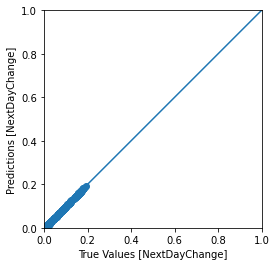

In [12]:
import matplotlib.pyplot as plt


test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [NextDayChange]')
plt.ylabel('Predictions [NextDayChange]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

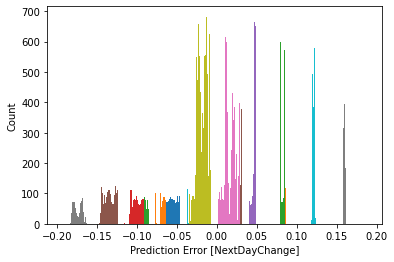

In [13]:
error = test_predictions - y_test
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [NextDayChange]')
_ = plt.ylabel('Count')

In [14]:
model.save('dnn_model')

NameError: ignored